#Data Explortaion

In [ ]:
!wget '/content/FastagFraudDetection.csv'
import pandas as pd
df = pd.read_csv('/content/FastagFraudDetection.csv')


/content/FastagFraudDetection.csv: Scheme missing.


In [ ]:
import pandas as pd
#load the data set
data=pd.read_csv("/content/FastagFraudDetection.csv")
print("Data set downloaded successfully")


Data set downloaded successfully


In [ ]:
#Display the first few rows of the dataset
print("First few of dataset:")
print(data.head())

First few of dataset:
   Transaction_ID       Timestamp Vehicle_Type         FastagID TollBoothID  \
0               1  1/6/2023 11:20         Bus   FTG-001-ABC-121       A-101   
1               2  1/7/2023 14:55          Car  FTG-002-XYZ-451       B-102   
2               3  1/8/2023 18:25   Motorcycle              NaN       D-104   
3               4   1/9/2023 2:05        Truck  FTG-044-LMN-322       C-103   
4               5  1/10/2023 6:35          Van  FTG-505-DEF-652       B-102   

  Lane_Type Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
0   Express              Large                 350          120   
1   Regular              Small                 120          100   
2   Regular              Small                   0            0   
3   Regular              Large                 350          120   
4   Express             Medium                 140          100   

                   Geographical_Location  Vehicle_Speed Vehicle_Plate_Number  \
0  13.05981612345488

In [ ]:
#check the dimensions of the dataset (number of rows and columns)
print("\ndimensions of the data set:")
print(data.shape)


dimensions of the data set:
(5000, 13)


In [ ]:
#Summary statistics of numrical coloumns
print("Summary statisticS:")
print(data.describe())

Summary statisticS:
       Transaction_ID  Transaction_Amount  Amount_paid  Vehicle_Speed
count     5000.000000          5000.00000  5000.000000    5000.000000
mean      2500.500000           161.06200   141.261000      67.851200
std       1443.520003           112.44995   106.480996      16.597547
min          1.000000             0.00000     0.000000      10.000000
25%       1250.750000           100.00000    90.000000      54.000000
50%       2500.500000           130.00000   120.000000      67.000000
75%       3750.250000           290.00000   160.000000      82.000000
max       5000.000000           350.00000   350.000000     118.000000


In [ ]:
#Check for missing values
print("Missing values:")
print(data.isnull().sum())

Missing values:
Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64


In [ ]:
#Data types of columns
print("Data types:")
print(data.dtypes)

Data types:
Transaction_ID            int64
Timestamp                object
Vehicle_Type             object
FastagID                 object
TollBoothID              object
Lane_Type                object
Vehicle_Dimensions       object
Transaction_Amount        int64
Amount_paid               int64
Geographical_Location    object
Vehicle_Speed             int64
Vehicle_Plate_Number     object
Fraud_indicator          object
dtype: object


#Feature Engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Load the dataset
fastag_data=pd.read_csv("/content/FastagFraudDetection.csv")
#Feature Engineering
#Convert Timestamp to datetime
# Convert Timestamp to datetime
fastag_data['Timestamp'] = pd.to_datetime(fastag_data['Timestamp'])
# Extract date and time features
fastag_data['Day'] = fastag_data['Timestamp'].dt.day
fastag_data['Month'] = fastag_data['Timestamp'].dt.month
fastag_data['Year'] = fastag_data['Timestamp'].dt.year
fastag_data['Hour'] = fastag_data['Timestamp'].dt.hour
fastag_data['Minute'] = fastag_data['Timestamp'].dt.minute
#Encode categorical variables using LabelEncoder
label_encoder=LabelEncoder()
fastag_data['Vehicle_Type'] = label_encoder.fit_transform(fastag_data['Vehicle_Type'])
fastag_data['Lane_Type'] = label_encoder.fit_transform(fastag_data['Lane_Type'])
fastag_data['Geographical_Location'] = label_encoder.fit_transform(fastag_data['Geographical_Location'])
#Extract features from Vehicle_Plate_Number
#For example, extracting the state code or vehicle category
#Drop unnecessary columns
fastag_data.drop(['Transaction_ID', 'Timestamp', 'FastagID', 'TollBoothID', 'Vehicle_Dimensions', 'Vehicle_Plate_Number'], axis=1, inplace=True)
#Save the engineered dataset
fastag_data.to_csv('engineered_fastag_data.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Split the dataset into features (X) and target variable (y)
X = fastag_data.drop('Fraud_indicator', axis=1)
y=fastag_data['Fraud_indicator']
#Split the data into training and testing sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
#Initialize the Random Forest classifier
clf=RandomForestClassifier()
#Train the classifier on the training data
clf.fit(X_train, y_train)
#Make predictions on the testing data
y_pred=clf.predict(X_test)
#Evaluate the model
accuracy =accuracy_score(y_test, y_pred)
conf_matrix=confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
#Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.984
Confusion Matrix:
 [[201  16]
 [  0 783]]
Classification Report:
               precision    recall  f1-score   support

       Fraud       1.00      0.93      0.96       217
   Not Fraud       0.98      1.00      0.99       783

    accuracy                           0.98      1000
   macro avg       0.99      0.96      0.98      1000
weighted avg       0.98      0.98      0.98      1000



#ٌReal time Fraud Detection

In [ ]:
'''
from sklearn.ensemble import RandomForestClassifier
import joblib
import time
import pandas as pd

# Load the historical dataset
historical_data = pd.read_csv('/content/engineered_fastag_data.csv')

# Separate features and target variable
X = historical_data.drop('Fraud_indicator', axis=1)
y = historical_data['Fraud_indicator']

# Initialize the model
model = RandomForestClassifier()

# Train the model on historical data
model.fit(X, y)

# Save the trained model
joblib.dump(model, 'FastagFraudDetection.pkl')

# Load the trained model
model = joblib.load('FastagFraudDetection.pkl')

# Simulate real-time data arrival
try:
    while True:
        # Get new data (replace this with code to receive real-time data)
        new_data = pd.read_csv('/content/FastagFraudDetection.csv')

        # Ensure new_data has the same columns as the training data
        X_new = new_data[X.columns]

        # Predict fraud for the new data
        fraud_predictions = model.predict(X_new)

        # Print the predictions (or take further action)
        print("New data processed. Predicted fraud status:", fraud_predictions)

        # Wait for a specified time interval before processing next batch of data
        time.sleep(60)  # wait for 1 minute

except KeyboardInterrupt:
    print("Real-time data processing stopped by user.")
except Exception as e:
    print(f"An error occurred: {e}")
    '''


'\nfrom sklearn.ensemble import RandomForestClassifier\nimport joblib\nimport time\nimport pandas as pd\n\n# Load the historical dataset\nhistorical_data = pd.read_csv(\'/content/engineered_fastag_data.csv\')\n\n# Separate features and target variable\nX = historical_data.drop(\'Fraud_indicator\', axis=1)\ny = historical_data[\'Fraud_indicator\']\n\n# Initialize the model\nmodel = RandomForestClassifier()\n\n# Train the model on historical data\nmodel.fit(X, y)\n\n# Save the trained model\njoblib.dump(model, \'FastagFraudDetection.pkl\')\n\n# Load the trained model\nmodel = joblib.load(\'FastagFraudDetection.pkl\')\n\n# Simulate real-time data arrival\ntry:\n    while True:\n        # Get new data (replace this with code to receive real-time data)\n        new_data = pd.read_csv(\'/content/FastagFraudDetection.csv\')\n\n        # Ensure new_data has the same columns as the training data\n        X_new = new_data[X.columns]\n\n        # Predict fraud for the new data\n        fraud_pred

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import joblib
import time

# Load the historical dataset
historical_data = pd.read_csv('/content/engineered_fastag_data.csv')

# Separate features and target variable
X = historical_data.drop('Fraud_indicator', axis=1)
y = historical_data['Fraud_indicator']

# Initialize the model
model = RandomForestClassifier()

# Train the model on historical data
model.fit(X, y)

# Save the trained model
joblib.dump(model, 'fastag_fraud_detection_model.pkl')

# Load the trained model
model = joblib.load('fastag_fraud_detection_model.pkl')

# Define a function to preprocess new data
def preprocess_new_data(new_data):
    # Ensure new_data has the same columns as the training data
    expected_columns = X.columns
    new_data = new_data[expected_columns]
    return new_data

# Simulate real-time data arrival
while True:
    try:
        # Get new data (replace this with code to receive real-time data)
        new_data = pd.read_csv('/content/FastagFraudDetection.csv')

        # Preprocess the new data to match training data format
        X_new = preprocess_new_data(new_data)

        # Predict fraud for the new data
        fraud_predictions = model.predict(X_new)

        # Print the predictions (or take further action)
        print("New data processed. Predicted fraud status:", fraud_predictions)

        # Wait for a specified time interval before processing the next batch of data
        time.sleep(60)  # wait for 1 minute
    except Exception as e:
        print(f"Error processing new data: {e}")


Error processing new data: "['Day', 'Month', 'Year', 'Hour', 'Minute'] not in index"
Error processing new data: "['Day', 'Month', 'Year', 'Hour', 'Minute'] not in index"
Error processing new data: "['Day', 'Month', 'Year', 'Hour', 'Minute'] not in index"
Error processing new data: "['Day', 'Month', 'Year', 'Hour', 'Minute'] not in index"
Error processing new data: "['Day', 'Month', 'Year', 'Hour', 'Minute'] not in index"
Error processing new data: "['Day', 'Month', 'Year', 'Hour', 'Minute'] not in index"
Error processing new data: "['Day', 'Month', 'Year', 'Hour', 'Minute'] not in index"
Error processing new data: "['Day', 'Month', 'Year', 'Hour', 'Minute'] not in index"
Error processing new data: "['Day', 'Month', 'Year', 'Hour', 'Minute'] not in index"
Error processing new data: "['Day', 'Month', 'Year', 'Hour', 'Minute'] not in index"
Error processing new data: "['Day', 'Month', 'Year', 'Hour', 'Minute'] not in index"
Error processing new data: "['Day', 'Month', 'Year', 'Hour', 'Min

KeyboardInterrupt: 

In [ ]:
'''
from sklearn.ensemble import RandomForestClassifier
import joblib
import time
#Load the historical dataset
historical_data = pd.read_csv('/content/engineered_fastag_data.csv')
# Separate features and target variable
X= historical_data.drop('Fraud_indicator', axis=1)
y=historical_data['Fraud_indicator']
#Initialize the model
model= RandomForestClassifier()
#Train the model on historical data
model.fit(X, y)
#Save the trained model
joblib.dump(model, 'FastagFraudDetection.pkl')
#Simulate real-time data arrival
while True:
  #Get new data (replace this with code to receive real-time data)
  new_data=pd.read_csv('/content/engineered_fastag_data.csv')
#Separate features from the new data
  X_new=new_data.drop('Fraud_indicator', axis=1)
#Predict fraud for the new data
  fraud_predictions=model.predict (X_new)
#Print the predictions (or take further action)
print("New data processed. Predicted fraud status:", fraud_predictions)
#Wait for a specified time interval before processing next batch of data
time.sleep(60) # wait for 1 minute
'''

'\nfrom sklearn.ensemble import RandomForestClassifier\nimport joblib\nimport time\n#Load the historical dataset\nhistorical_data = pd.read_csv(\'/content/engineered_fastag_data.csv\')\n# Separate features and target variable\nX= historical_data.drop(\'Fraud_indicator\', axis=1)\ny=historical_data[\'Fraud_indicator\']\n#Initialize the model\nmodel= RandomForestClassifier()\n#Train the model on historical data\nmodel.fit(X, y)\n#Save the trained model\njoblib.dump(model, \'FastagFraudDetection.pkl\')\n#Simulate real-time data arrival\nwhile True:\n  #Get new data (replace this with code to receive real-time data)\n  new_data=pd.read_csv(\'/content/engineered_fastag_data.csv\')\n#Separate features from the new data\n  X_new=new_data.drop(\'Fraud_indicator\', axis=1)\n#Predict fraud for the new data\n  fraud_predictions=model.predict (X_new)\n#Print the predictions (or take further action)\nprint("New data processed. Predicted fraud status:", fraud_predictions)\n#Wait for a specified time

#ُExplanatory Analysis

First few rows of the dataset:
   Transaction_ID       Timestamp Vehicle_Type         FastagID TollBoothID  \
0               1  1/6/2023 11:20         Bus   FTG-001-ABC-121       A-101   
1               2  1/7/2023 14:55          Car  FTG-002-XYZ-451       B-102   
2               3  1/8/2023 18:25   Motorcycle              NaN       D-104   
3               4   1/9/2023 2:05        Truck  FTG-044-LMN-322       C-103   
4               5  1/10/2023 6:35          Van  FTG-505-DEF-652       B-102   

  Lane_Type Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
0   Express              Large                 350          120   
1   Regular              Small                 120          100   
2   Regular              Small                   0            0   
3   Regular              Large                 350          120   
4   Express             Medium                 140          100   

                   Geographical_Location  Vehicle_Speed Vehicle_Plate_Number  \
0  13.05981

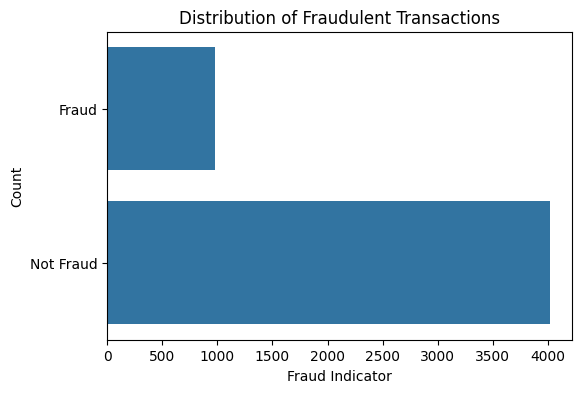

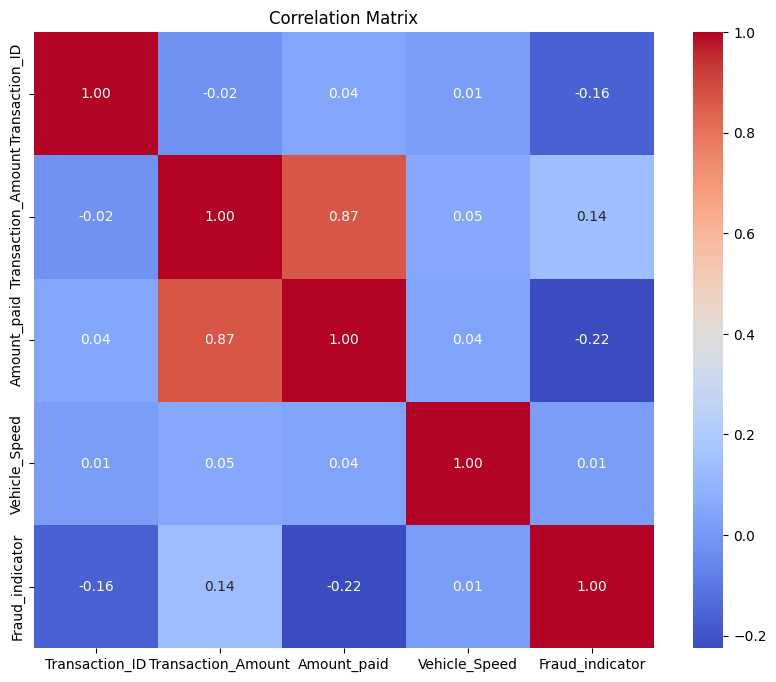

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('/content/FastagFraudDetection.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Summary statistics
print("\nSummary statistics:")
print(data.describe())

# Visualize the distribution of the target variable (Fraud_indicator)
plt.figure(figsize=(6, 4))
sns.countplot(data['Fraud_indicator'])
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()

# Convert categorical columns to numerical if needed or drop them
data['Fraud_indicator'] = data['Fraud_indicator'].apply(lambda x: 1 if x == 'Fraud' else 0)

# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
'''import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Load the data
data=pd.read_csv('/content/FastagFraudDetection.csv')
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())
#Summary statistics
print("\nSummary statistics:")
print(data.describe())
#Visualize the distribution of the target variable (Fraud_indicator)
plt.figure(figsize=(6,4))
sns.countplot(data['Fraud_indicator'])
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()
#Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()'''

'import pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n#Load the data\ndata=pd.read_csv(\'/content/FastagFraudDetection.csv\')\n# Display the first few rows of the dataset\nprint("First few rows of the dataset:")\nprint(data.head())\n#Summary statistics\nprint("\nSummary statistics:")\nprint(data.describe())\n#Visualize the distribution of the target variable (Fraud_indicator)\nplt.figure(figsize=(6,4))\nsns.countplot(data[\'Fraud_indicator\'])\nplt.title(\'Distribution of Fraudulent Transactions\')\nplt.xlabel(\'Fraud Indicator\')\nplt.ylabel(\'Count\')\nplt.show()\n#Visualize the correlation matrix\nplt.figure(figsize=(10, 8))\nsns.heatmap(data.corr(), annot=True, cmap=\'coolwarm\', fmt=\'.2f\')\nplt.title(\'Correlation Matrix\')\nplt.show()'